## Example from Think Stats

http://thinkstats2.com

Copyright 2019 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def decorate(**options):
    """Decorate the current axes.
    
    Call decorate with keyword arguments like
    decorate(title='Title',
             xlabel='x',
             ylabel='y')
             
    The keyword arguments can be any of the axis properties
    https://matplotlib.org/api/axes_api.html
    """
    ax = plt.gca()
    ax.set(**options)
    
    handles, labels = ax.get_legend_handles_labels()
    if handles:
        ax.legend(handles, labels)

    plt.tight_layout()

In [3]:
def normal_probability_plot(sample, fit_color='0.8', **options):
    """Makes a normal probability plot with a fitted line.

    sample: sequence of numbers
    fit_color: color string for the fitted line
    options: passed along to Plot
    """   
    n = len(sample)
    xs = np.random.normal(0, 1, n)
    xs.sort()
    
    mean, std = np.mean(sample), np.std(sample)

    fit_ys = mean + std * xs

    plt.plot(xs, fit_ys, color=fit_color, label='model')

    ys = np.array(sample, copy=True)
    ys.sort()
    
    plt.plot(xs, ys, **options)

## Central Limit Theorem

If you add up independent variates from a distribution with finite mean and variance, the sum converges on a normal distribution.

The following function generates samples with difference sizes from an exponential distribution.

In [4]:
def make_expo_samples(beta=2.0, iters=1000):
    """Generates samples from an exponential distribution.

    beta: parameter
    iters: number of samples to generate for each size

    returns: map from sample size to sample
    """
    samples = {}
    for n in [1, 10, 100]:
        sample = [np.sum(np.random.exponential(beta, n))
                  for _ in range(iters)]
        samples[n] = sample
    return samples

This function generates normal probability plots for samples with various sizes.

In [5]:
def normal_plot_samples(samples, ylabel=''):
    """Makes normal probability plots for samples.

    samples: map from sample size to sample
    label: string
    """
    plt.figure(figsize=(8, 3))
    
    plot = 1
    for n, sample in samples.items():
        plt.subplot(1, 3, plot)
        plot += 1
        
        normal_probability_plot(sample)

        decorate(title='n=%d' % n,
                 xticks=[],
                         yticks=[],
                         xlabel='Random normal variate',
                         ylabel=ylabel)


The following plot shows how the sum of exponential variates converges to normal as sample size increases.

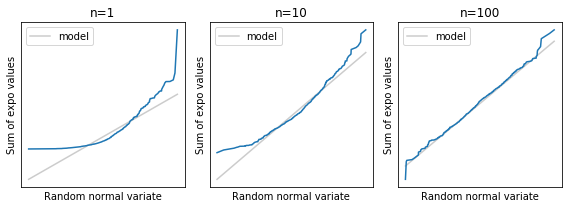

In [6]:
samples = make_expo_samples()
normal_plot_samples(samples, ylabel='Sum of expo values')

The lognormal distribution has higher variance, so it requires a larger sample size before it converges to normal.

In [7]:
def make_lognormal_samples(mu=1.0, sigma=1.0, iters=1000):
    """Generates samples from a lognormal distribution.

    mu: parmeter
    sigma: parameter
    iters: number of samples to generate for each size

    returns: list of samples
    """
    samples = {}
    for n in [1, 10, 100]:
        sample = [np.sum(np.random.lognormal(mu, sigma, n))
                  for _ in range(iters)]
        samples[n] = sample
    return samples

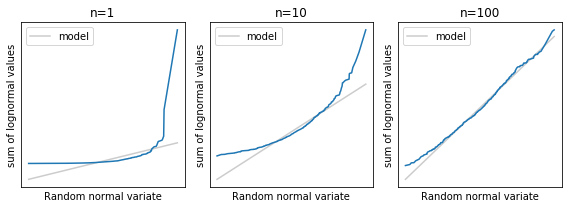

In [8]:
samples = make_lognormal_samples()
normal_plot_samples(samples, ylabel='sum of lognormal values')

The Pareto distribution has infinite variance, and sometimes infinite mean, depending on the parameters.  It violates the requirements of the CLT and does not generally converge to normal.

In [9]:
def make_pareto_samples(alpha=1.0, iters=1000):
    """Generates samples from a Pareto distribution.

    alpha: parameter
    iters: number of samples to generate for each size

    returns: list of samples
    """
    samples = {}

    for n in [1, 10, 100]:
        sample = [np.sum(np.random.pareto(alpha, n))
                  for _ in range(iters)]
        samples[n] = sample
    return samples

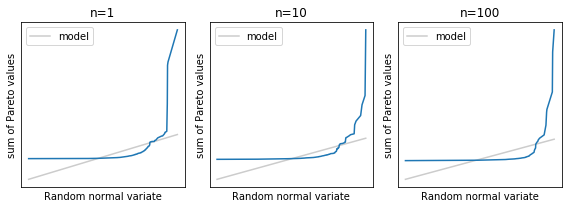

In [10]:
samples = make_pareto_samples()
normal_plot_samples(samples, ylabel='sum of Pareto values')

If the random variates are correlated, that also violates the CLT, so the sums don't generally converge.

To generate correlated values, we generate correlated normal values and then transform to whatever distribution we want.

In [11]:
def generate_correlated(rho, n):
    """Generates a sequence of correlated values from a standard normal dist.
    
    rho: coefficient of correlation
    n: length of sequence

    returns: iterator
    """
    x = np.random.normal(0, 1)
    yield x

    sigma = np.sqrt(1 - rho**2)
    for _ in range(n-1):
        x = np.random.normal(x * rho, sigma)
        yield x

In [12]:
from scipy.stats import norm
from scipy.stats import expon

def generate_expo_correlated(rho, n):
    """Generates a sequence of correlated values from an exponential dist.

    rho: coefficient of correlation
    n: length of sequence

    returns: NumPy array
    """
    normal = list(generate_correlated(rho, n))
    uniform = norm.cdf(normal)
    expo = expon.ppf(uniform)
    return expo

In [13]:
def make_correlated_samples(rho=0.9, iters=1000):
    """Generates samples from a correlated exponential distribution.

    rho: correlation
    iters: number of samples to generate for each size

    returns: list of samples
    """    
    samples = {}
    for n in [1, 10, 100]:
        sample = [np.sum(generate_expo_correlated(rho, n))
                  for _ in range(iters)]
        samples[n] = sample
    return samples


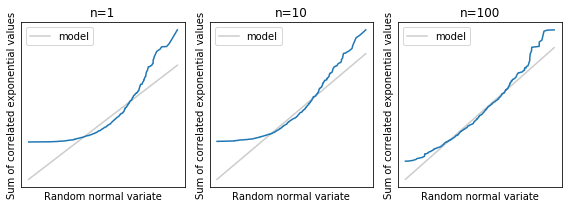

In [14]:
samples = make_correlated_samples()
normal_plot_samples(samples, 
                    ylabel='Sum of correlated exponential values')

## Exercises

**Exercise:**    In Section 5.4, we saw that the distribution of adult weights is approximately lognormal. One possible explanation is that the weight a person gains each year is proportional to their current weight. In that case, adult weight is the product of a large number of multiplicative factors:

w = w0 f1 f2 ... fn  

where w is adult weight, w0 is birth weight, and fi is the weight gain factor for year i.

The log of a product is the sum of the logs of the factors:

logw = log w0 + log f1 + log f2 + ... + log fn 

So by the Central Limit Theorem, the distribution of logw is approximately normal for large n, which implies that the distribution of w is lognormal.

To model this phenomenon, choose a distribution for f that seems reasonable, then generate a sample of adult weights by choosing a random value from the distribution of birth weights, choosing a sequence of factors from the distribution of f, and computing the product. What value of n is needed to converge to a lognormal distribution?

In [15]:
# Solution goes here

In [16]:
# Solution goes here

In [17]:
# Solution goes here

In [18]:
# Solution goes here